<a href="https://colab.research.google.com/github/KaziShadmanSakib/Artificial-Intelligence/blob/main/TitanicPipelineAndPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [341]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# name of the files in the folder
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# train data fetched
train_data = pd.read_csv("/content/drive/MyDrive/Titanic/train.csv")

# test data fetched
test_data = pd.read_csv("/content/drive/MyDrive/Titanic/test.csv")

# checking the train_data columns
train_data.head()

/content/drive/MyDrive/Titanic/train.csv
/content/drive/MyDrive/Titanic/gender_submission.csv
/content/drive/MyDrive/Titanic/test.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [342]:
# checking the test_data columns
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [343]:
# deleted redundant column named Ticket 
del train_data["Ticket"]
del test_data["Ticket"]
# print(train_data.sum())

# deleted redundant column named Name 
del train_data["Name"]
del test_data["Name"]
# print(train_data.sum())

# deleted redundant column named Cabin 
del train_data["Cabin"]
del test_data["Cabin"]
# print(train_data.sum())

# deleted redundant column named Embarked 
del train_data["Embarked"]
del test_data["Embarked"]
# print(train_data.sum())

# checking which column has null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

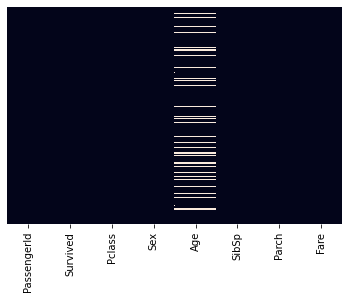

In [344]:
# visualization of null values in all columns of train data
import seaborn as sns

sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False)

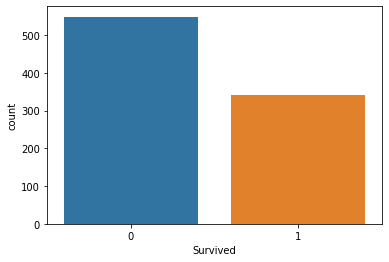

In [345]:
# visualization of column Survived to check survived vs not survived ratio
sns.countplot(x = "Survived", data = train_data)

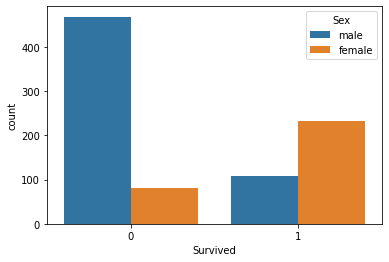

In [346]:
# visualization of column Survived to check survived vs not survived ratio on men and women
sns.countplot(x = "Survived", hue="Sex" , data = train_data)

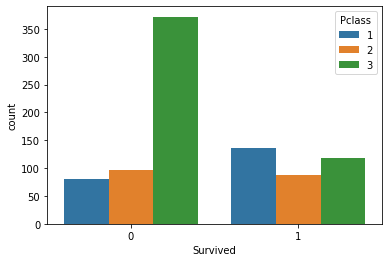

In [347]:
# visualization of column Survived to check survived vs not survived ratio on pclass
sns.countplot(x = "Survived", hue="Pclass" , data = train_data)

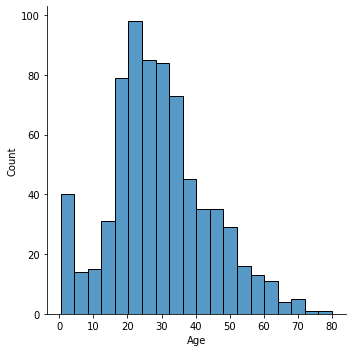

In [348]:
# visualizing age frequency
sns.displot(train_data['Age'].dropna())

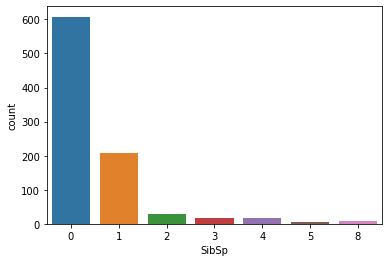

In [349]:
#visualizing SibSp frequency
sns.countplot(x = 'SibSp', data = train_data)

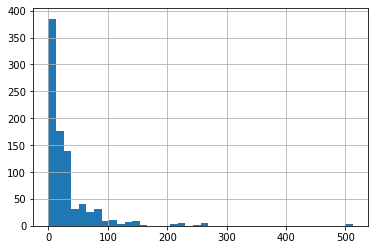

In [350]:
# visualizing fare frequency
train_data['Fare'].hist(bins = 40)

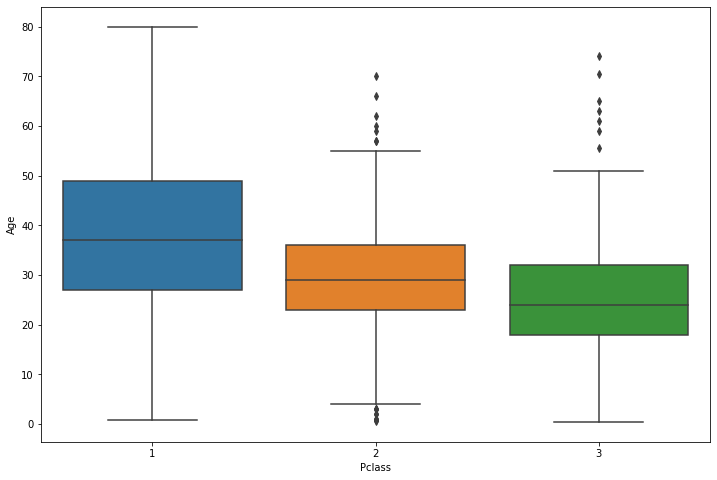

In [351]:
# box plot of Age vs Pclass
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
sns.boxplot(x = "Pclass", y = "Age", data = train_data)

In [352]:
# Feature Engineering on Age of null data, based on pclass
# pclass 1 == 38
# pclass 2 == 28
# pclass 3 == 25
def ageEngineering(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return 38
    elif pclass == 2:
      return 28
    else:
      return 25
  else:
    return age

# feature engineering of Age based on Pclass
train_data['Age'] = train_data[['Age', "Pclass"]].apply(ageEngineering, axis = 1)
test_data['Age'] = test_data[['Age', "Pclass"]].apply(ageEngineering, axis = 1)

In [353]:
# checking if there is any other null values
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

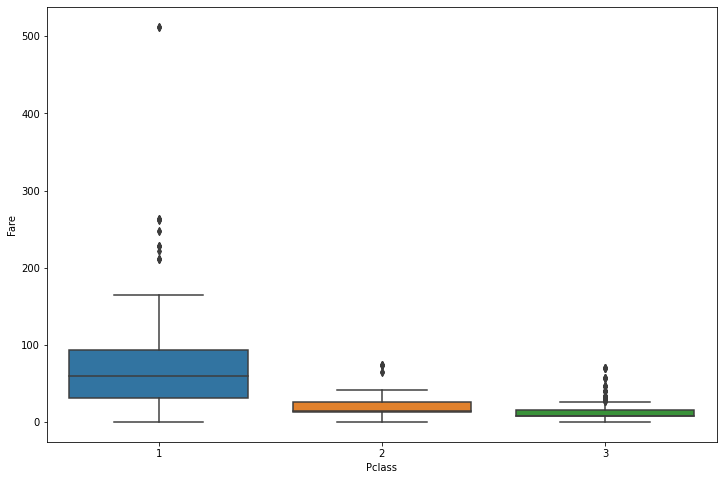

In [354]:
# box plot of Fare vs Pclass
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
sns.boxplot(x = "Pclass", y = "Fare", data = train_data)

In [355]:
# Feature Engineering on fare of null data, based on pclass
# pclass 1 == 65
# pclass 2 == 19
# pclass 3 == 9
def fareEngineering(cols):
  fare = cols[0]
  pclass = cols[1]

  if pd.isnull(fare):
    if pclass == 1:
      return 65
    elif pclass == 2:
      return 19
    else:
      return 9
  else:
    return fare

# feature engineering of Age based on Pclass
train_data['Fare'] = train_data[['Fare', "Pclass"]].apply(fareEngineering, axis = 1)
test_data['Fare'] = test_data[['Fare', "Pclass"]].apply(fareEngineering, axis = 1)

In [356]:
# Prediction on Survived data
y = train_data["Survived"]

# features that will be used to train and test data
features = ["Pclass", "Sex", "Age" , "SibSp", "Parch"]

# dummies of train data and test data with features
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# training model with X to y and predicting y with test data
model = LogisticRegression(random_state=0).fit(X, y)
predictions = model.predict(X_test)

# prediction score on train data
print(model.score(X, y))

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

0.8080808080808081
Your submission was successfully saved!
